## PD6

In [42]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Opis zbioru danych

In [43]:
data = pd.read_csv('/Users/ola/Downloads/data-laptops.csv')
data

,Brand,Product_Description,Screen_Size,RAM,Processor,GPU,GPU_Type,Resolution,Condition,Price
0,Lenovo,Lenovo ThinkPad 14” HD Laptop PC Computer Core...,14.0,16,Intel Core i5 7th Gen.,Intel HD Graphics 520,Integrated/On-Board Graphics,NaN,Very Good - Refurbished,189.99
1,Dell,"Dell Latitude 15.6"" Laptop Intel Core i5 64GB ...",15.6,64,Intel Core i5 8th Gen.,Intel UHD Graphics 620,Integrated/On-Board Graphics,1920 x 1080,Very Good - Refurbished,349.99
2,HP,"NEW HP 15 Laptop. 15.6"" 1080p, i5-1135G7, 8GB ...",15.6,8,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,369.95
3,Lenovo,2024 Lenovo Ideapad Laptop 15 FHD Touch Intel ...,15.6,Up,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,459.00
4,Lenovo,"2024 Lenovo Ideapad Laptop 15.6"" FHD Touch Int...",15.6,16,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,499.00
...,...,...,...,...,...,...,...,...,...,...
2947,Dell,Dell Latitude 7320 i5-1145G7 8GB 256GB BT5 WiF...,13.3,8,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,Open box,789.99
2948,MSI,NEW MSI COMPUTER Sword 15 A12UC-295 Sword15122...,15.6,8,Intel Core i5 12th Gen.,NVIDIA GeForce RTX 3050,Dedicated Graphics,1920 x 1080,New,895.55
2949,Dell,Dell Precision 5550 Workstation 15 15.6 Laptop...,15.6,8,Intel Core i5 10th Gen.,Intel HD Graphics,Integrated/On-Board Graphics,1920 x 1200,Excellent - Refurbished,635.65
2950,HP,"HP 15 Laptop 15.6"" FHD i5-1135G7 8GB RAM 256GB...",15.6,8,Intel Core i5 11th Gen.,Intel Iris Xe Graphics,Integrated/On-Board Graphics,1920 x 1080,New,405.99


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2952 non-null   object 
 1   Product_Description  2952 non-null   object 
 2   Screen_Size          2952 non-null   float64
 3   RAM                  2952 non-null   object 
 4   Processor            2952 non-null   object 
 5   GPU                  2604 non-null   object 
 6   GPU_Type             2718 non-null   object 
 7   Resolution           2565 non-null   object 
 8   Condition            2952 non-null   object 
 9   Price                2952 non-null   float64
dtypes: float64(2), object(8)
memory usage: 230.8+ KB


### Analiza zmiennych - statystyki

In [7]:
data.describe()

,Screen_Size,Price
count,2952.000000,2952.000000
mean,14.550237,517.552805
std,1.175322,235.592872
min,10.000000,0.000000
25%,14.000000,325.990000
50%,14.000000,489.990000
75%,15.600000,699.000000
max,18.000000,999.990000


In [18]:
data.groupby('Brand')['Brand'].count().sort_values(ascending = False).reset_index(name = 'count')

,Brand,count
0,Dell,1109
1,Lenovo,627
2,HP,578
3,Microsoft,197
4,Asus,134
5,Acer,100
6,MSI,62
7,Samsung,61
8,LG,38
9,Gateway,13


### Analiza zmiennych w zalezności od zmiennej jakościowej

In [48]:
data.groupby("Brand").Price.agg("mean").sort_values(ascending = False).reset_index(name = 'Average price')

,Brand,Average price
0,Ruggon,800.000000
1,Eurocom,800.000000
2,Getac,759.490000
3,Intel,724.995000
4,MSI,718.793226
5,LG,694.176579
6,Samsung,647.595082
7,Gigabyte,631.463333
8,Microsoft,611.832843
9,Panasonic,584.658000


### Wykresy analizujące rozkład zmiennych 

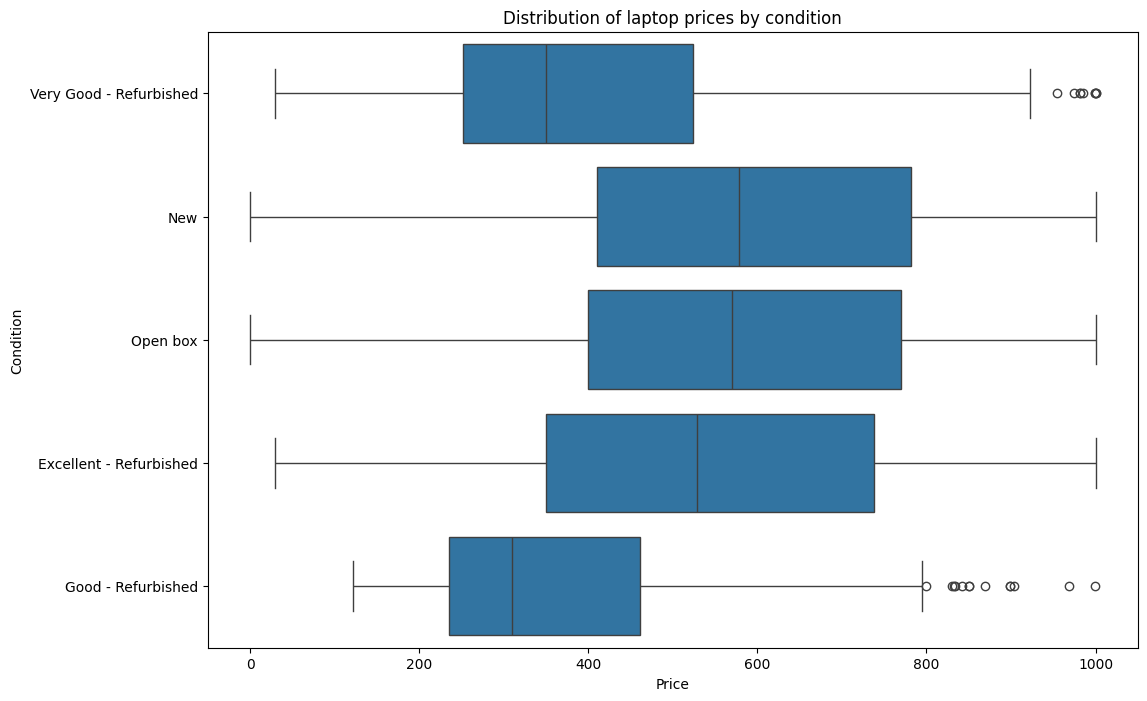

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data, y = "Condition", x = "Price")
plt.title("Distribution of laptop prices by condition")
plt.show()

Rozkład cen nowych laptopów nowych oraz laptopów nie uzywanych i zwróconych (Open box) jest bardzo podobny. Najnizsze ceny mają laptopy, które są w dobrym stanie i są odnowione, ale ta kategoria ma tez najwiecej outlierów. 

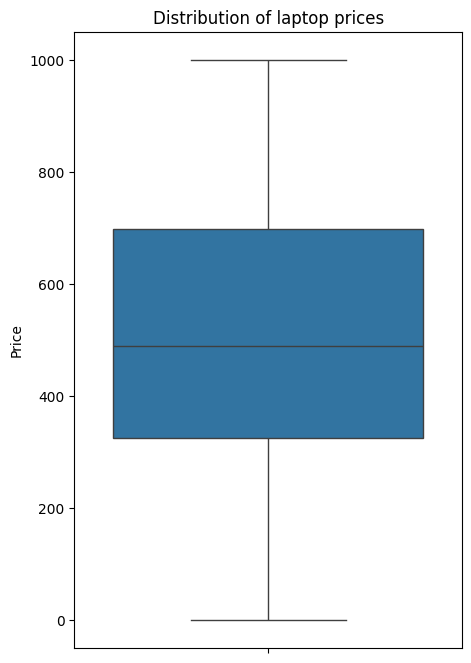

In [53]:
plt.figure(figsize=(5,8))
sns.boxplot(data = data, y = "Price")
plt.title("Distribution of laptop prices")
plt.show()

Mediana cen wynosi około 500 dolarów, a najdrozsze laptopy kosztują 1000 dolarów.

### Wykresy wskazujące zalezności 

<Figure size 640x480 with 0 Axes>

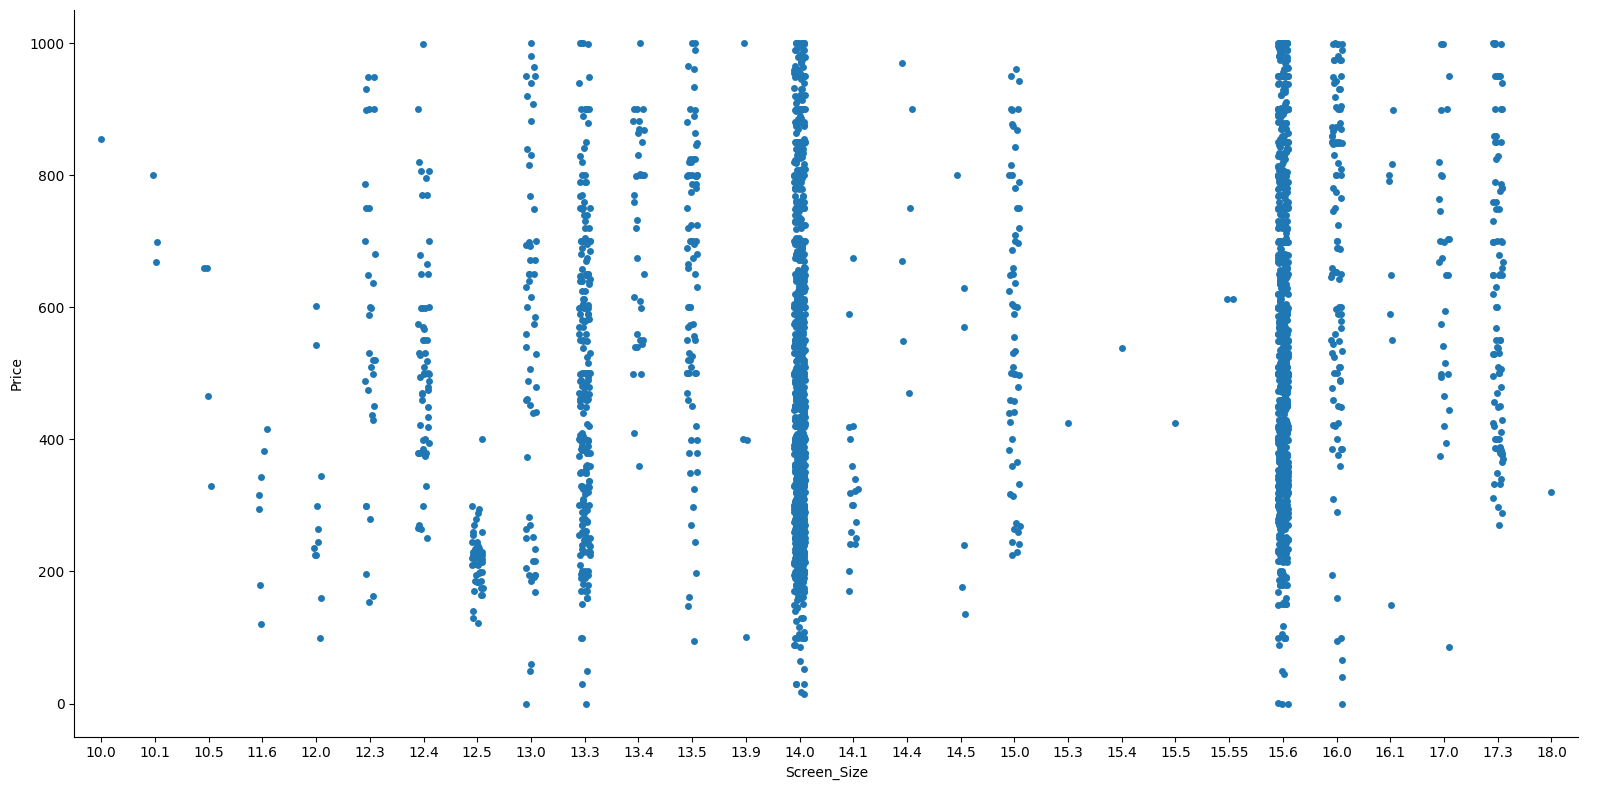

In [99]:
plt.figure()
sns.catplot(data=data, x = "Screen_Size", y = "Price", height=8, aspect=2)
plt.show()

Najwięcej jest laptopów o przekątnej ekranu 14 i 15 cali i ich ceny rozkładają się dosyć równomiernie. Laptopy wielkośći 12,5 cala są w cenach 100-300 dolarów. 

In [79]:
data1 = data.groupby('GPU_Type')['Price'].mean().sort_values(ascending = False).reset_index(name = 'avg-price')

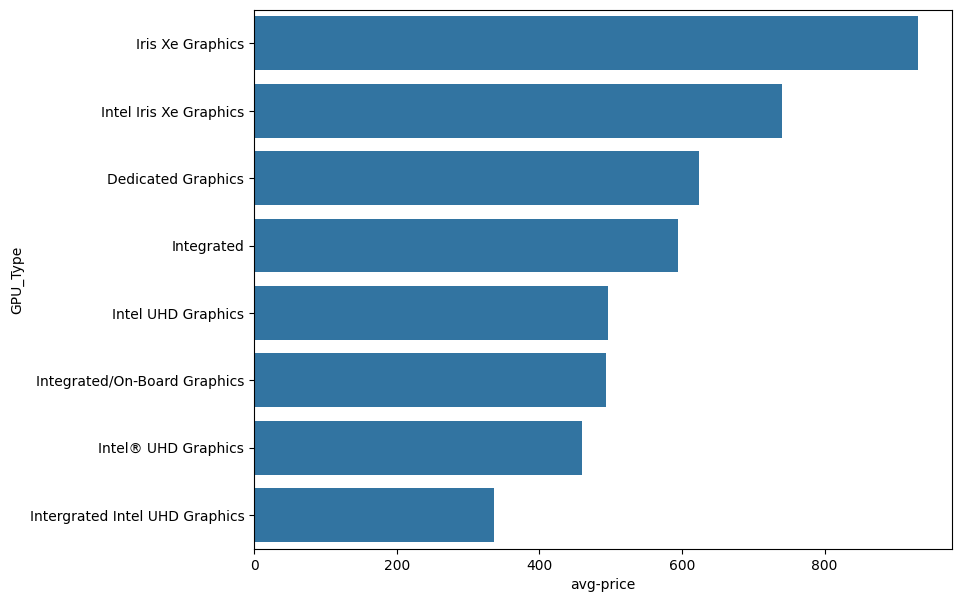

In [80]:
plt.figure(figsize=(9,7))
sns.barplot(data1, y="GPU_Type", x="avg-price")
plt.show()

Wykres pokazuje zalezność między średnią ceną, a procesorem graficznym w komputerze. Widzimy, ze srednio najwiecej kosztuja komputery z procesorem graficznym typu Iris Xe Graphics, a najmiej Integrated Intel UHD Graphics.